## Метод наименьших квадратов

Банникова Екатерина
НПМбд-01-19

In [4]:
import numpy as np
from matplotlib import pyplot as plt

Рассмотрим  функцию на отрезке [1,15]: <br> <center> $f (x) = sin\frac{x}{5}*e^{\frac{x}{10}} + 5 e^{-\frac{1}{2} x}$

В этом задании мы будем приближать указанную функцию с помощью многочлена $w_0$ + $w_1$ $x$ +  $w_2$ $x^{2}$ + $w_2$ $x^{3}$ + ... + $w_{n-1}$ $x^{n-1}$

## 1. Полиномиальная регрессия

Многочлен  степени n - 1 однозначно определяется любыми n различными точками, через которые он проходит. Это значит, что его n неизвестных коэффициентовможно определить из следующей системы линейных уравнений: <br> \begin{cases} w_0 + w_1 x_1 +  w_2 x_1^{2} + w_2 x_1^{3} + ... + w_{n-1} x_1^{n-1} = f (x_1)\\...\\w_0 + w_1 x_n +  w_2 x_n^{2} + w_2 x_n^{3} + ... + w_{n-1} x_n^{n-1} = f (x_n)\end{cases}

Создадим функцию для нахождения коэффициентов полинома. В матрицу А будут записаны соответствующие значения степеней $x_i$, в вектор b - значения $f(x_i)$. Искомые коэффициенты будут решением системы $Ax=b$

In [5]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

def compute_polynomial_coeffs(n):
    '''
    n - количество точек
    '''
    xx = np.linspace(1, 15, n)
    yy = f(xx)
    b = yy
    A = np.zeros((n, n))
    for i in range(n):
        A[:,i] = xx**i
    return np.linalg.solve(A, b)

def polynome(w, x):
    n = len(w)
    result = 0
    for i in range(n):
        result += w[i] * x**i
    return result

Посмотрим на результат работы функций n=4. При n=4 полином достаточно отличается от исходной функции. 

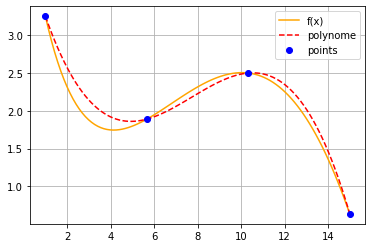

In [8]:
n = 4
w = compute_polynomial_coeffs(n)
xx = np.linspace(1, 15, 100)
plt.plot(xx, f(xx), label='f(x)', color = 'orange')
plt.plot(xx, polynome(w, xx), '--', label='polynome', color = 'red')
x_points = np.linspace(1, 15, n)
y_points = f(x_points)
plt.plot(x_points, y_points, 'o', label='points', color = 'blue')
plt.legend()
plt.grid()

Полином достаточно хорошо приближает функцию, при этом с ростом числа точек (степени полинома) приближение начинает практически соответствовать исходной функции. Заметим, что при n=15 графики функции и полинома практически одинаковые.

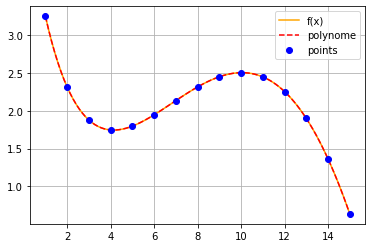

In [9]:
n = 15
w = compute_polynomial_coeffs(n)
xx = np.linspace(1, 15, 100)
plt.plot(xx, f(xx), label='f(x)', color = 'orange')
plt.plot(xx, polynome(w, xx), '--', label='polynome', color = 'red')
x_points = np.linspace(1, 15, n)
y_points = f(x_points)
plt.plot(x_points, y_points, 'o', label='points', color = 'blue')
plt.legend()
plt.grid()

## 2. Полиномиальная регрессия с зашумлёнными данными

Значение функции f дано с некоторым шумом.

In [10]:
def compute_polynomial_coeffs(xx, yy):
    '''
    xx, yy - набор точек и значений неизвестной функции
    '''
    n = len(xx)
    b = yy
    A = np.zeros((n, n))
    for i in range(n):
        A[:,i] = xx**i
    return np.linalg.solve(A, b)

def polynome(w, x):
    n = len(w)
    result = 0
    for i in range(n):
        result += w[i] * x**i
    return result

При добавлении шума мы видим, что при увеличении количества точек полином начинает вести себя "плохо" в области концов графика даже при низких значениях шума. Так как при добавлении даже небольшой погрешности матрица А становится плохо обусловленной.

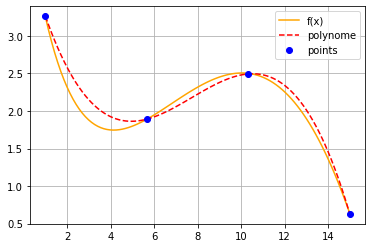

In [13]:
n = 4
noise = 0.01
x_points = np.linspace(1, 15, n)
y_points = f(x_points) + np.random.randn(n) * noise

w = compute_polynomial_coeffs(x_points, y_points)

xx = np.linspace(1, 15, 100)
plt.plot(xx, f(xx), label='f(x)', color = 'orange')
plt.plot(xx, polynome(w, xx), '--', label='polynome', color = 'red')
plt.plot(x_points, y_points, 'o', label='points', color = 'blue')
plt.legend()
plt.grid()

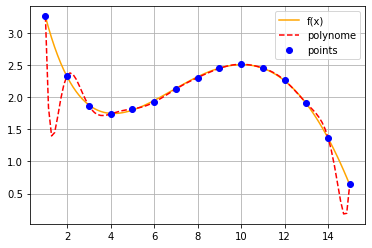

In [14]:
n = 15
noise = 0.01
x_points = np.linspace(1, 15, n)
y_points = f(x_points) + np.random.randn(n) * noise

w = compute_polynomial_coeffs(x_points, y_points)

xx = np.linspace(1, 15, 100)
plt.plot(xx, f(xx), label='f(x)', color = 'orange')
plt.plot(xx, polynome(w, xx), '--', label='polynome', color = 'red')
plt.plot(x_points, y_points, 'o', label='points', color = 'blue')
plt.legend()
plt.grid()

## 3. Метод наименьших квадратов

Пусть количество точек равно N, степень искомого полинома - n, где N>n. Тогда в СЛАУ будет больше уравнений, чем число неизвестных.
В таком случае, вместо точного решения системы уравнений необходимо решить задачу минимизации неувязки.
Решение можно найти с помощью матрицы Мура-Пенроуза: $x = A^+ b = (A^T A)^{-1} A^T b$

In [15]:
def mnk(xx, yy):
    '''
    xx, yy - набор точек и значений неизвестной функции
    '''
    n = len(xx)
    b = yy
    A = np.ones([n, 5])
    for i in range(1, 5):
        A[:, i] = xx ** i
    return np.linalg.inv(A.transpose().dot(A)).dot(A.transpose()).dot(b)

def polynome(w, x):
    n = len(w)
    result = 0
    for i in range(n):
        result += w[i] * x**i
    return result

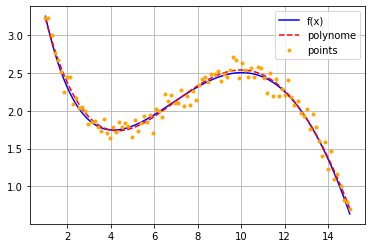

In [16]:
n = 100
noise = 0.1
x_points = np.linspace(1, 15, n)
y_points = f(x_points) + np.random.randn(n) * noise

w = mnk(x_points, y_points)

xx = np.linspace(1, 15, 100)
plt.plot(x_points, f(x_points), label='f(x)', color = 'blue')
plt.plot(x_points, polynome(w, x_points), '--', label='polynome', color = 'red')
plt.plot(x_points, y_points, 'o', label='points', color = 'orange', markersize = 3)
plt.legend()
plt.grid()

Метод наименьших квадратов позволяет аппроксимировать данные с достаточно близкой точностью, строить полиномы с большим числом точек и малых значением степеней, при этом даже с шумом аппроксимация будет близка к точным данным.